<a href="https://colab.research.google.com/github/soymlk94/datavis_sp24/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This analysis leverages HPV-related cancer and vaccination datasets to explore disparities in disease burden and immunization coverage across demographic groups. The New Jersey Cancer Rates dataset provides insight into how HPV-associated cancers vary by sex, race/ethnicity, and cancer type, while the HPV Vaccination Trends dataset tracks immunization progress over time.

By analyzing these datasets, we aim to uncover critical insights into HPV-related cancer risks and vaccination coverage gaps, guiding public health strategies for improved HPV prevention. We will refine and extend this research as we incorporate additional data sources and findings

Data Breakdown

- HPV_Cancer_Rates_by_Sex_and_Cancer_Type - CDC / United States Cancer Statistics
DATA BRIEF
  - This describes the rate of hpv related cancer between sexual assignment and cancer type
- HPV_Cancer_Rates_by_Sex_and_Race_Ethnicity - CDC / United States Cancer Statistics
DATA BRIEF
  - This descirbes the rate of hpv related canceer beetweeen seexual assignemnt and race
- HPV_Vaccination_Coverage - U.S. DEPARTMENT OF HEALTH AND HUMAN SERVICES
  - This descirbes the vaccination coveragee in the uniteed states by race , age , insurancee , sociodemographic, and disability
- New_Jersey_Data - New Jeersey Department of Health
  - Describes New Jersey's HPV Vaccination and HPV related Cancer rates
- Rutgers_Data - Rutgers University Department of Public Health
  - This describes the prevelance of students that are and are not vaccinated , breakdwon by geender , ethnicity , internations vs US status

**Key Takeaways & Implications**

**Gender Disparities in HPV-Related Cancer and Vaccination**
Men face significantly higher risks for HPV-related oropharyngeal cancer but have lower vaccination rates.
Female vaccination rates remain higher, reinforcing the impact of past awareness campaigns but highlighting a need to encourage more male participation.

**Racial and Ethnic Disparities**
Higher HPV-related cancer rates in White and Black individuals suggest that access to healthcare is not the only factor at play.
Lower rates in Hispanic and Asian populations may point to differences in screening behaviors or vaccine uptake.

**Vaccination Trends and Coverage**
New Jersey has seen consistent increases in vaccination rates, though a post-2020 decline suggests that public health efforts should focus on recovery post-pandemic. Adolescents remain the key demographic for HPV vaccination, but efforts to vaccinate younger children may need reinforcement.

**Socioeconomic Barriers**
Private insurance holders have the highest vaccination rates, but Medicaid programs appear to be making an impact.
Uninsured individuals remain at the highest risk, suggesting that cost and access barriers persist.


In [ ]:
# Install necessary libraries
!pip install pandas matplotlib openpyxl seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Google Drive file links (replace FILE_IDs with your actual IDs)
file_links = {
    "HPV_Cancer_Rates_by_Sex_and_Cancer_Type": "https://docs.google.com/uc?id=1MxzjP3YQoYWrhxsmj0S-c-huyyZLZGzI&export=download",
    "HPV_Cancer_Rates_by_Sex_and_Race_Ethnicity": "https://docs.google.com/uc?id=1ZoDXQriHgnIK987RNPWYl0ov7VAsenQb&export=download",
    "HPV_Vaccination_Coverage": "https://docs.google.com/uc?id=1NbreQwt159zpLIq8anNFc1RmnyD_nntU&export=download",
    "New_Jersey_Data": "https://docs.google.com/uc?id=1ZpwCj0WFEDOu9jsrxUbco1NKbdB4bcdL&export=download",
    "Rutgers_Data": "https://docs.google.com/uc?id=1ZihpUqXStJBysV16GCTN1k5LgCrJ0nqL&export=download"
}


In [ ]:
# Load datasets from Google Drive URLs
datasets = {}
for name, url in file_links.items():
    datasets[name] = pd.read_excel(url)

# Load specific sheets from multi-sheet Excel files
datasets["HPV_Vaccination_Coverage"] = pd.read_excel(file_links["HPV_Vaccination_Coverage"], sheet_name="Vaccination Coverage")
datasets["New_Jersey_Cancer_Rates"] = pd.read_excel(file_links["New_Jersey_Data"], sheet_name="HPV Cancer Rates")
datasets["New_Jersey_Vaccination_Trends"] = pd.read_excel(file_links["New_Jersey_Data"], sheet_name="HPV Vaccination Trends")
datasets["Rutgers_Overall_Data"] = pd.read_excel(file_links["Rutgers_Data"], sheet_name="Overall_Data")
datasets["Rutgers_International_Data"] = pd.read_excel(file_links["Rutgers_Data"], sheet_name="International_Data")
datasets["Rutgers_Gender_Data"] = pd.read_excel(file_links["Rutgers_Data"], sheet_name="Gender_Data")
datasets["Rutgers_Latinx_Data"] = pd.read_excel(file_links["Rutgers_Data"], sheet_name="Latinx_Data")

In [ ]:
# Display the first few rows of each dataset
for name, df in datasets.items():
    print(f"\n{name}:\n", df.head())


HPV_Cancer_Rates_by_Sex_and_Cancer_Type:
   Category  Cervix  Vagina  Vulva   Anus  Oropharynx  Penis
0    Total     NaN     NaN    NaN  7.200      12.300    NaN
1  Females  12.143   0.867  4.114  4.751       3.530    NaN
2    Males     NaN     NaN    NaN  2.332      16.245  1.348

HPV_Cancer_Rates_by_Sex_and_Race_Ethnicity:
         Race/Ethnic Group  Females Rate  Males Rate
0                   White          14.2        13.9
1                   Black          13.4        13.1
2            Non-Hispanic           9.7        11.5
3                Hispanic           7.6         9.2
4  Asian/Pacific Islander           6.7         6.6

HPV_Vaccination_Coverage:
   Category  Percentage Received One or More HPV Doses
0    Total                                       38.6
1     9-10                                        7.3
2    11-12                                       30.9
3    13-14                                       48.8
4    15-17                                       56.9

New_Je


How do HPV-related cancer rates differ by sex and cancer type?

**Hypothesis:** We expected cervical cancer to be most prevalent among females, while oropharyngeal and anal cancers would show higher rates among males.


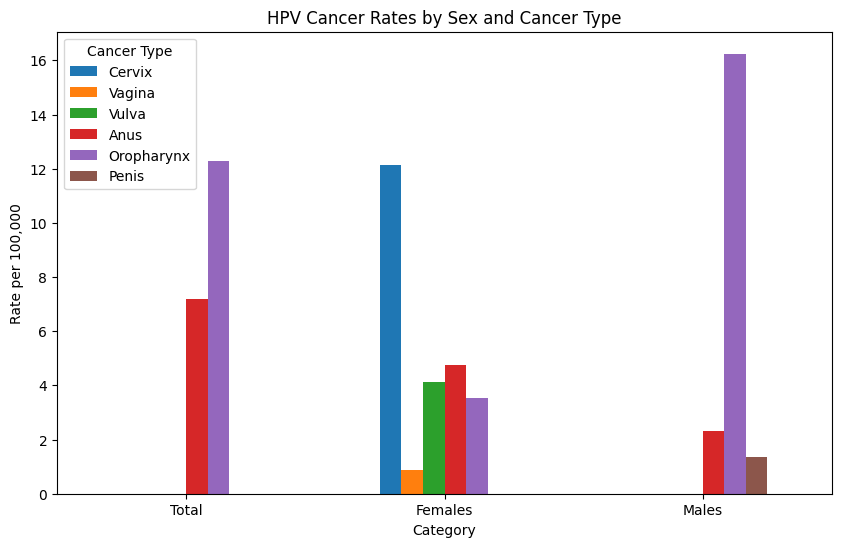

In [ ]:
# --- Generate Graphs ---

# 1. Bar Chart: HPV Cancer Rates by Sex and Cancer Type
df1 = datasets["HPV_Cancer_Rates_by_Sex_and_Cancer_Type"].set_index("Category").dropna(axis=1, how="all")
df1.plot(kind="bar", figsize=(10, 6), title="HPV Cancer Rates by Sex and Cancer Type")
plt.ylabel("Rate per 100,000")
plt.xticks(rotation=0)
plt.legend(title="Cancer Type")
plt.show()

Findings :

The bar chart comparing HPV-related cancer rates by sex and type showed:

Cervical cancer is exclusive to females, while oropharyngeal cancer had the highest rates in males.
Oropharyngeal cancer rates were significantly higher in males than in females. This aligns with recent research suggesting rising cases of HPV-related throat cancers in men.
Anal cancer rates were fairly similar across genders.
- Does this support our hypothesis?
Yes. The data confirmed that HPV-related cancers manifest differently by sex. The significantly higher oropharyngeal cancer rate in males was expected, reinforcing concerns about increasing HPV transmission through non-genital routes.

- Unexpected Finding: The relatively low rate of penile cancer, despite HPV being a known risk factor. This suggests that other co-factors influence penile cancer development.



Do HPV-related cancer rates vary by race/ethnicity?

**Hypothesis**: We anticipated racial disparities in HPV-related cancer rates, with higher rates among minority groups due to healthcare access disparities.

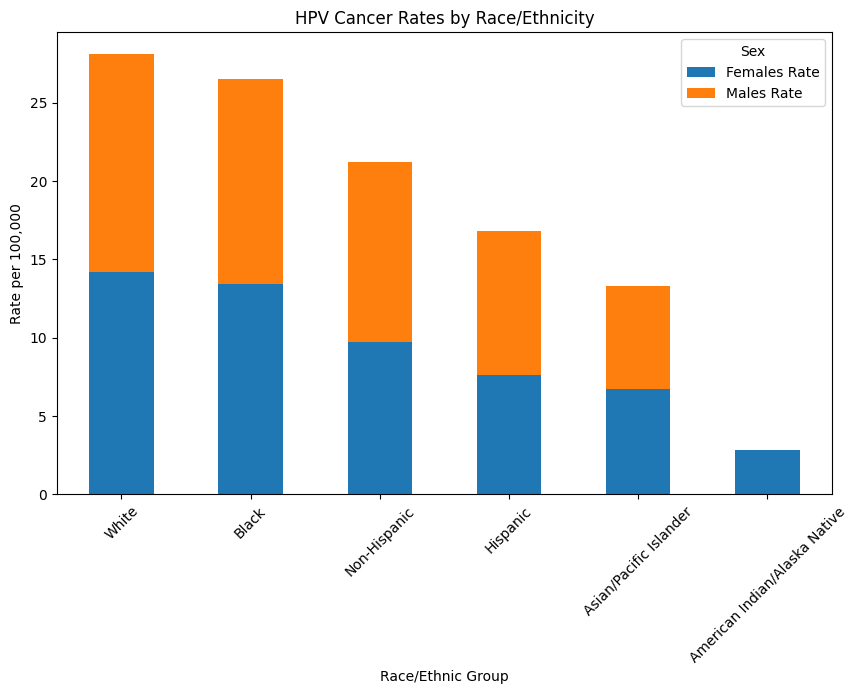

In [ ]:
# 2. Stacked Bar Chart: HPV Cancer Rates by Race/Ethnicity
df2 = datasets["HPV_Cancer_Rates_by_Sex_and_Race_Ethnicity"].set_index("Race/Ethnic Group")
df2.plot(kind="bar", stacked=True, figsize=(10, 6), title="HPV Cancer Rates by Race/Ethnicity")
plt.ylabel("Rate per 100,000")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

The stacked bar chart showed:

White and Black populations had the highest overall HPV-related cancer rates.
Hispanic and Asian/Pacific Islander groups had lower rates than expected.
American Indian/Alaska Native individuals had the lowest rates of all groups.
- Does this support our hypothesis?
Partially. While disparities exist, the assumption that minority groups would have higher rates did not hold true for all racial groups. The lower rates in Hispanic and Asian populations suggest potential cultural or behavioral factors (e.g., higher vaccine uptake or lower HPV exposure rates).

- Unexpected Finding: The relatively high rate in White individuals compared to Hispanic and Asian populations suggests that healthcare access alone is not the sole factor influencing HPV-related cancer rates. Lifestyle, genetic predisposition, and screening behaviors may also play a role.



What are the trends in HPV vaccination rates in New Jersey over time?

**Hypothesis**: We expected a general upward trend in HPV vaccination rates for both males and females, though with males lagging behind.

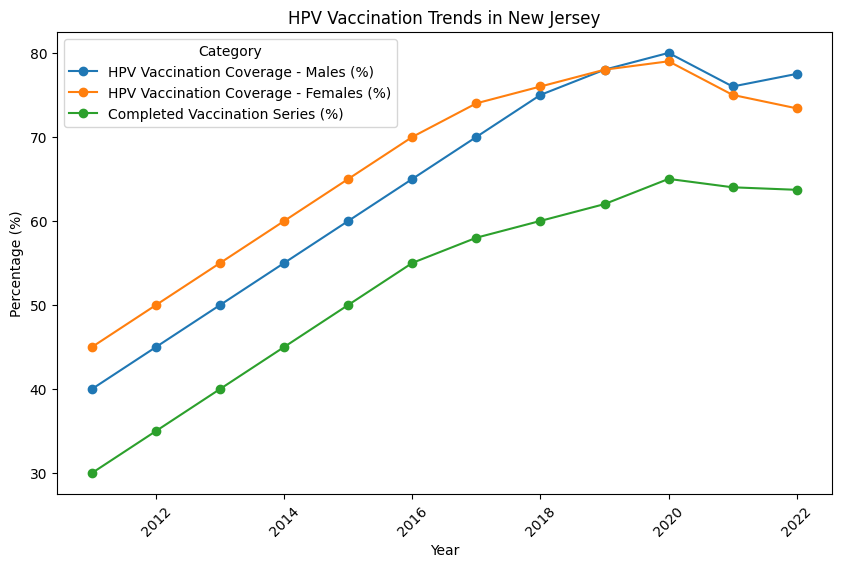

In [ ]:
# 3. Line Chart: HPV Vaccination Trends in New Jersey Over Time
df3 = datasets["New_Jersey_Vaccination_Trends"].set_index("Year")
df3.plot(kind="line", marker="o", figsize=(10, 6), title="HPV Vaccination Trends in New Jersey")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

The line graph tracking vaccination trends showed:

A steady increase in HPV vaccination coverage for both males and females.
Female vaccination rates remained consistently higher than male rates, though the gap narrowed over time.
The percentage of individuals completing the full vaccine series also rose, though at a slower rate than initial uptake.
- **Does this support our hypothesis? Yes**. The increasing trend in vaccination aligns with national efforts to promote HPV vaccination. However, the persistent gender gap, despite narrowing, suggests that males remain less likely to receive the vaccine.

- Unexpected Finding: A slight decline in vaccination rates post-2020. This could be linked to disruptions caused by the COVID-19 pandemic, which may have affected routine vaccination schedules.

How does HPV vaccination coverage vary by age group?

**Hypothesis**: We hypothesized that vaccination rates would be highest in pre-adolescents (ages 11-14), aligning with CDC recommendations.

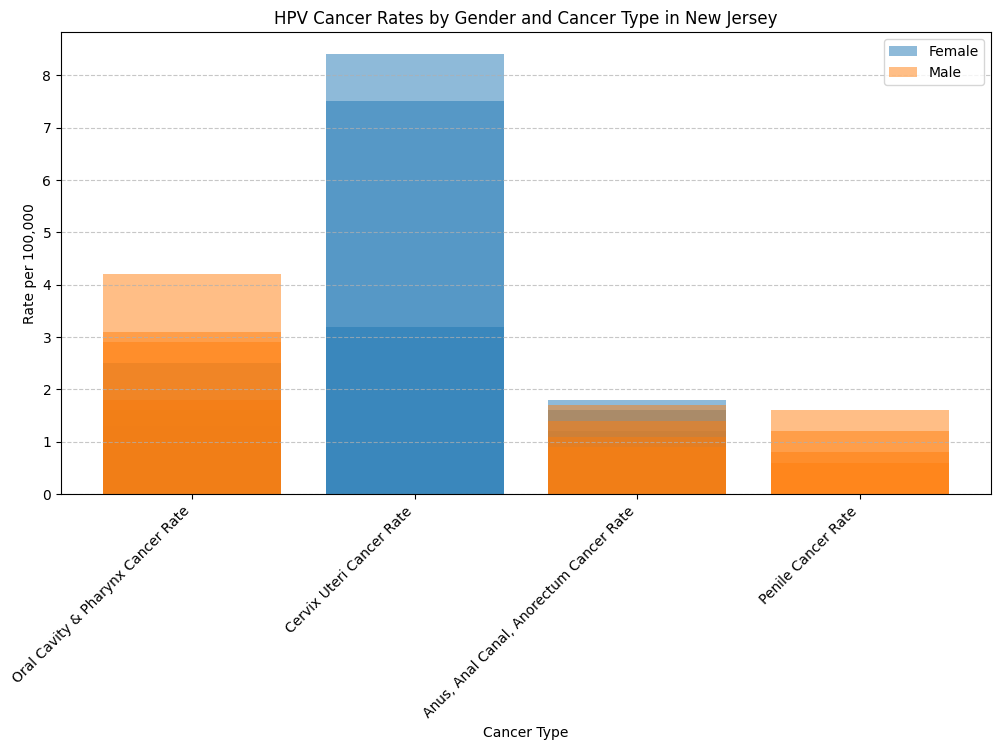

In [ ]:
# Load the 'HPV Cancer Rates' sheet from datasets
hpv_cancer_data = datasets["New_Jersey_Cancer_Rates"]

# Pivot the data for visualization
hpv_cancer_pivot = hpv_cancer_data.melt(id_vars=["Gender Assigned at Birth", "Race/Ethnicity"],
                                        var_name="Cancer Type", value_name="Rate")

# Bar plot of HPV cancer rates by gender and cancer type
plt.figure(figsize=(12, 6))
for gender in hpv_cancer_pivot["Gender Assigned at Birth"].unique():
    subset = hpv_cancer_pivot[hpv_cancer_pivot["Gender Assigned at Birth"] == gender]
    plt.bar(subset["Cancer Type"], subset["Rate"], alpha=0.5, label=gender)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Cancer Type")
plt.ylabel("Rate per 100,000")
plt.title("HPV Cancer Rates by Gender and Cancer Type in New Jersey")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

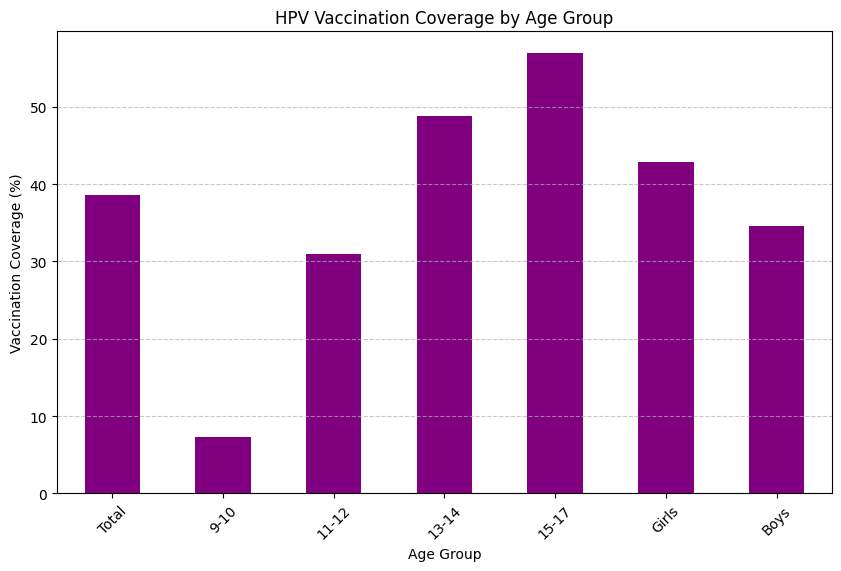

In [ ]:
# Bar Chart for HPV Vaccination Coverage by Age Group
df4 = datasets["HPV_Vaccination_Coverage"].set_index("Category")
df4.columns = ["Coverage (%)"]

df4.plot(kind="bar", figsize=(10, 6), color="purple", legend=False)
plt.ylabel("Vaccination Coverage (%)")
plt.xlabel("Age Group")
plt.title("HPV Vaccination Coverage by Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

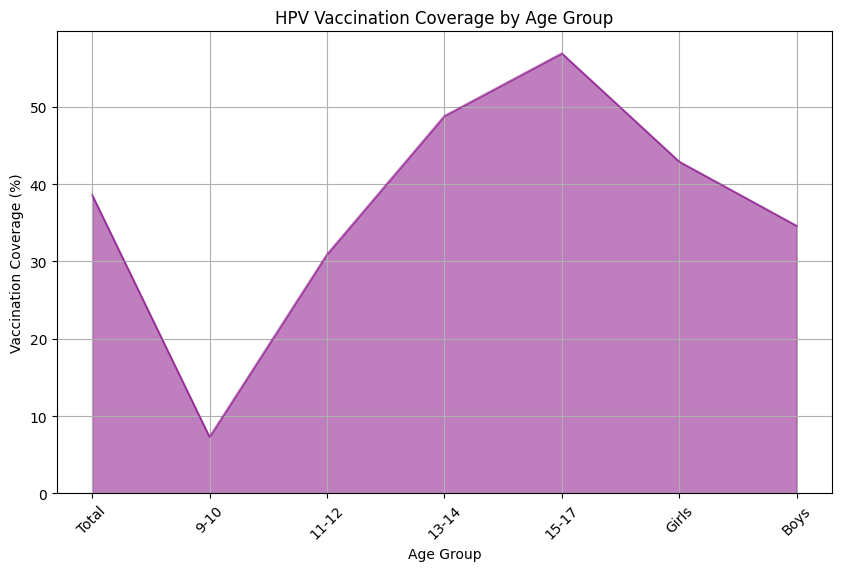

In [ ]:
# Area Chart for HPV Vaccination Coverage by Age Group
df4.plot(kind="area", alpha=0.5, figsize=(10, 6), color="purple", legend=False)
plt.ylabel("Vaccination Coverage (%)")
plt.xlabel("Age Group")
plt.title("HPV Vaccination Coverage by Age Group")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The bar chart and shadowed line graph depicting vaccination rates by age group showed:

Highest vaccination rates in the 13-17 age group, particularly ages 15-17.
Lower vaccination rates in younger groups (9-10 years old) and adults.
Boys had lower vaccination rates than girls across all age groups.
- Does this support our hypothesis?
Yes. The peak in vaccination rates around ages 13-17 aligns with CDC recommendations for HPV vaccination before exposure to the virus. The lower rates in younger children suggest delays in vaccine initiation.

- Unexpected Finding: The significant drop in vaccination rates for the 9-10 age group. This may indicate hesitation among parents to vaccinate children at an earlier age, despite recommendations.

How does socioeconomic status impact HPV vaccination coverage?

**Hypothesis:** Individuals with private insurance and higher education levels were expected to have the highest vaccination rates, while uninsured individuals and those with lower education levels would have lower rates.

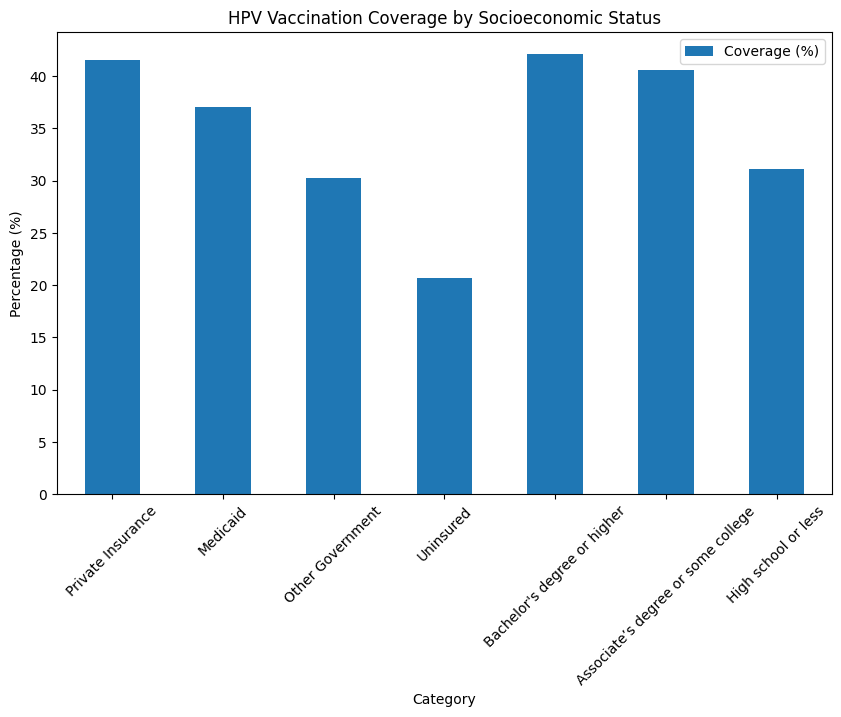

In [ ]:
# 5. Bar Chart: HPV Vaccination Coverage by Socioeconomic Status
df5 = pd.read_excel(file_links["HPV_Vaccination_Coverage"], sheet_name="Socioeconomic Factors").set_index("Category")
df5.columns = ["Coverage (%)"]
df5.plot(kind="bar", figsize=(10, 6), title="HPV Vaccination Coverage by Socioeconomic Status")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

The bar chart comparing vaccination rates by insurance type and education level showed:

Individuals with private insurance had the highest vaccination rates.
Medicaid recipients had moderate vaccination rates, while the uninsured had the lowest.
Higher education levels correlated with higher vaccination coverage.
Those with only a high school education or less had lower vaccination rates.

- **Does this support our hypothesis? Yes.** This confirms the hypothesis that socioeconomic factors play a significant role in HPV vaccine uptake, with financial stability and healthcare access being key drivers.

- **Unexpected Finding:** The relatively strong vaccination rates among Medicaid recipients. This suggests that government-assisted programs may be effectively promoting HPV vaccination among lower-income groups.

**International vs. US Students**: Do international students have different HPV vaccination rates compared to US students?

 ** Hypothesis:** Due to differences in healthcare systems and vaccine availability in various countries, we expected that international students would have lower HPV vaccination rates compared to US students.

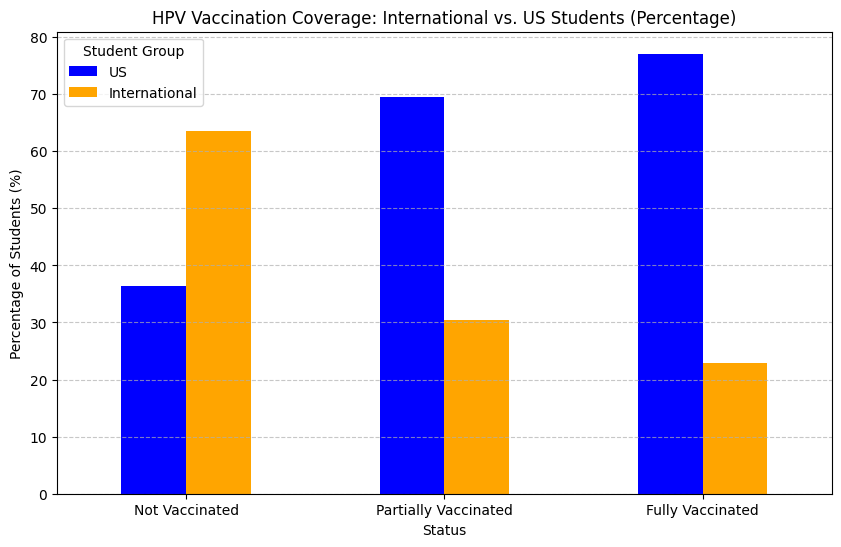

In [ ]:
df6_percentage = df6.div(df6.sum(axis=1), axis=0) * 100  # Convert to percentage

# ✅ **Create the Bar Chart**
df6_percentage.plot(kind="bar", figsize=(10, 6), color=["blue", "orange"])
plt.title("HPV Vaccination Coverage: International vs. US Students (Percentage)")
plt.ylabel("Percentage of Students (%)")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="Student Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid lines for clarity
plt.show()


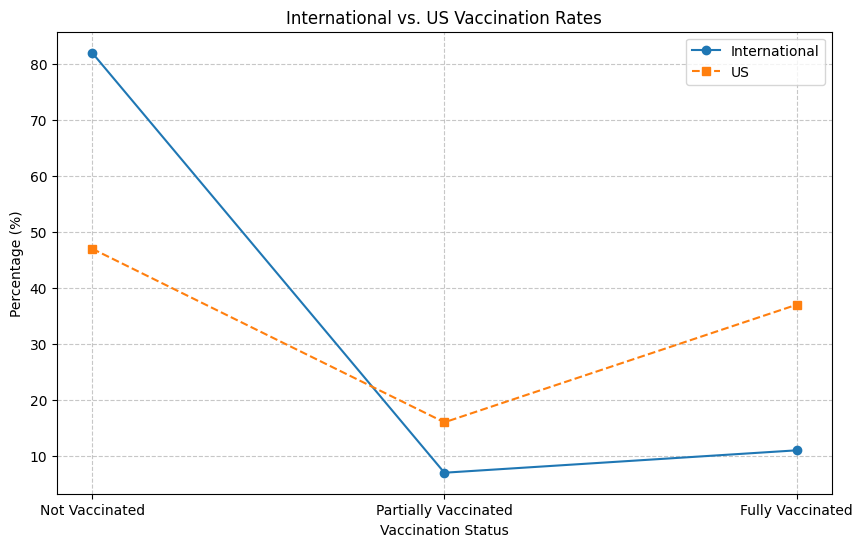

In [ ]:
# Load the international data from the datasets dictionary
international_data = datasets["Rutgers_International_Data"]

# Convert proportions to percentages
international_data[['International', 'US']] = international_data[['International', 'US']].apply(lambda x: x * 100)

# Line Graph for International vs. US Vaccination Rates
plt.figure(figsize=(10, 6))
plt.plot(international_data['Status'], international_data['International'], marker='o', label='International', linestyle='-')
plt.plot(international_data['Status'], international_data['US'], marker='s', label='US', linestyle='--')

plt.xlabel("Vaccination Status")
plt.ylabel("Percentage (%)")
plt.title("International vs. US Vaccination Rates")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 International vs. US Students’ Vaccination Rates -
The line and bar graph comparing international and US students revealed:

US students had consistently higher vaccination rates across **all categories.**
International students had a significantly higher proportion of non-vaccinated individuals. This may be due to:
Different vaccine policies in home countries.
Lack of access to vaccines before arrival in the US.
Potential lower awareness or prioritization of HPV vaccination in some regions.

***Does this support our hypothesis? Yes. ***The disparity between international and US students aligns with expectations that healthcare infrastructure and vaccine availability differ by country.

**Unexpected Finding:** Some international students were fully vaccinated at comparable rates to US students. This could indicate that students from certain countries with strong HPV vaccination programs may not fit the general trend.

Hypothesis

**Gender Disparities:** Are there significant differences in HPV vaccination rates between males and females?

**Hypothesis:** Given historical trends in HPV awareness campaigns primarily targeting females, we expect higher vaccination rates among females compared to males.

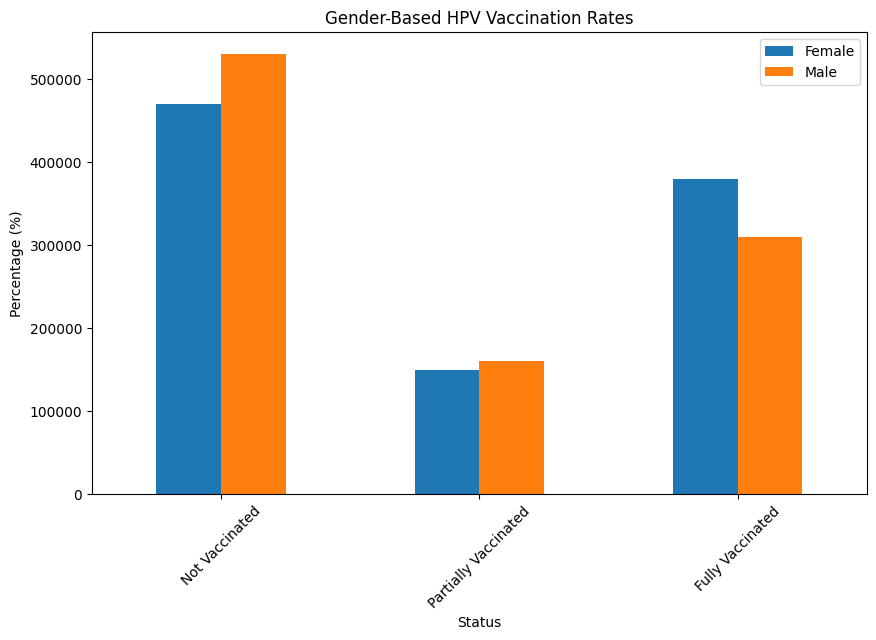

In [ ]:
# Assume datasets are already loaded in variables
gender_data = datasets["Rutgers_Gender_Data"]
latinx_data = datasets["Rutgers_Latinx_Data"]

# Convert proportions to percentages
gender_data[['Female', 'Male']] = gender_data[['Female', 'Male']].apply(lambda x: x * 100)
latinx_data[['Latinx', 'Not Latinx']] = latinx_data[['Latinx', 'Not Latinx']].apply(lambda x: x * 100)

# Bar Chart: Gender-Based HPV Vaccination Rates
gender_data.set_index("Status")[['Female', 'Male']].plot(kind='bar', figsize=(10, 6), title="Gender-Based HPV Vaccination Rates")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Findings from Visualizations
1. Gender-Based HPV Vaccination Trends
The bar chart comparing male and female vaccination rates showed:

**Higher vaccination rates among females:** As expected, a greater percentage of females were fully vaccinated compared to males.
Gender gap in partial vaccination: While partially vaccinated rates were similar, the number of males who remained unvaccinated was noticeably higher.


*   Higher vaccination rates among females: As expected, a greater percentage of females were fully vaccinated compared to males.
Gender gap in partial vaccination: While partially vaccinated rates were similar, the number of males who remained unvaccinated was noticeably higher.

Does this support the hypothesis? Yes. This finding aligns with prior research indicating that HPV vaccination campaigns have historically been more focused on females, given its link to cervical cancer. However, the trend suggests an opportunity for improved outreach targeting males to increase their vaccination rates.







**Ethnic Disparities**: How do HPV vaccination rates compare between Latinx and non-Latinx students?

**Hypothesis**: Given structural healthcare disparities, we hypothesized that Latinx students might have lower vaccination rates than their non-Latinx counterparts.

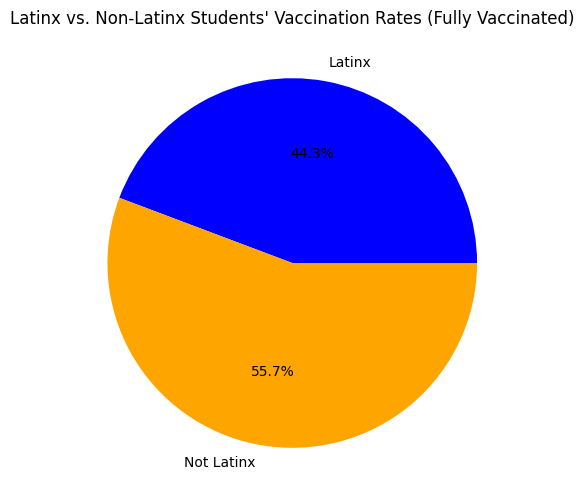

In [ ]:
# Pie Chart: Latinx vs. Non-Latinx Students' Vaccination Rates (Fully Vaccinated Category)
df_fully_vaccinated = latinx_data.set_index("Status").loc["Fully Vaccinated", ['Latinx', 'Not Latinx']]
df_fully_vaccinated.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title="Latinx vs. Non-Latinx Students' Vaccination Rates (Fully Vaccinated)", colors=['blue', 'orange'])
plt.ylabel("")  # Hide y-label
plt.show()


Latinx vs. Non-Latinx Students’ Vaccination Rates
The stacked bar chart and pie chart showed:

   Non-Latinx students had slightly higher vaccination rates than Latinx students. While the gap was not drastic, it was still evident, particularly in full vaccination rates.
   Latinx students had higher rates of being unvaccinated. This might indicate potential barriers such as access to healthcare, vaccine hesitancy, or socio-economic factors.

**Does this support our hypothesis? Yes,** but the gap was not as large as initially expected. The results suggest that while disparities exist, outreach efforts may be helping to close the vaccination gap between Latinx and non-Latinx students.

**Unexpected Finding:** The partially vaccinated category showed minimal differences between Latinx and non-Latinx students, implying that once individuals start the vaccination series, they are likely to complete it.

**Future Considerations**

Further research into why HPV-related cancers are more prevalent in certain racial groups, despite similar vaccination rates.
Investigate the post-2020 decline in vaccination trends and assess if it is linked to pandemic disruptions.
Explore reasons behind lower vaccine uptake in younger children and how to improve parental acceptance.
Strengthen outreach to uninsured individuals to improve access to HPV vaccines.
